2023-1 ML 교육세션 실습 자료를 참고했습니다.

In [1]:
# 데이터셋 불러오기
# spaceship_tt.csv 데이터프레임을 이용해, "Transported"값을 분류 대상으로 삼는 decision tree classifier 만들기
import numpy as np
import pandas as pd
df = pd.read_csv('spaceship_tt.csv')

In [2]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId : 승객 ID

HomePlanet : 출발 행성(거주지)

CryoSleep : 취침 방식 여부

Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

Destination : 목적지

Age : 승객의 나이

VIP : 승객의 VIP 서비스 유무

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액

Name : 이름

Transported : 도착 여부

In [10]:
# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# base dataframe
df_base=df[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [ ]:
df_base.dropna(inplace=True)

<ipython-input-6-3c1dfc79aac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.dropna(inplace=True)


In [ ]:
df_base

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [ ]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=111)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('Transported',axis=1),
                                                    df_base['Transported'], # target variable = Transported
                                                    test_size=0.3, random_state=111)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5664,False,10.0,False,0.0,0.0,0.0,0.0,0.0
6303,False,28.0,False,32.0,0.0,304.0,291.0,2.0
963,False,0.0,False,0.0,0.0,0.0,0.0,0.0
6375,False,21.0,False,1244.0,0.0,1119.0,0.0,3.0
8299,False,34.0,False,0.0,3126.0,0.0,112.0,15.0
...,...,...,...,...,...,...,...,...
5017,True,38.0,False,0.0,0.0,0.0,0.0,0.0
5787,False,33.0,True,0.0,3095.0,0.0,197.0,40.0
2429,True,34.0,False,0.0,0.0,0.0,0.0,0.0
8421,False,39.0,False,2101.0,41.0,0.0,525.0,19.0


In [ ]:
# 평가지표 출력
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7601102941176471


# 다양한 모델을 통한 평가

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
# n_estimators를 변경 가능
# 모델별로 추가 parameter 튜닝 가능
rf_reg = RandomForestRegressor(n_estimators=200)
gbm_reg = GradientBoostingRegressor(n_estimators=200)
xgb_reg = XGBRegressor(n_estimators=200)
lgbm_reg = LGBMRegressor(n_estimators=200)

In [ ]:
model = rf_reg  # random forest


# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환하는 함수 정의
from sklearn.metrics import mean_squared_error # regressor를 위한 평가 지표
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    mse = mean_squared_error(y_test, pred)

    print('###', model.__class__.__name__, '###')
    print('Mean Squared Error:', mse)


In [ ]:
get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
Mean Squared Error: 0.46786184743142384


In [ ]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=False):
    model1.fit(X_train, y_train)
    model1_pred = model1.predict(X_test)
    model2.fit(X_train, y_train)
    model2_pred = model2.predict(X_test)

    pred = 0.4*model1_pred + 0.6*model2_pred # 각 모델의 반영 가중치 설정

    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)

    print('### Two Models ###')
    print('Mean Squared Error:', mse)

In [ ]:
model1 = rf_reg
model2 = gbm_reg  # GBM Model (Boosting)

get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=True)


### Two Models ###
Mean Squared Error: 0.45131028356723396


## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

Grouping이란 데이터에서 숨겨진 구조와 패턴을 파악하여 데이터가 어떻게 구성되었는지를 알아내는 것이다.  Dataset을 Grouping 한다는 것은 해당 dataset안의 data의 특징 및 서로간의 관계를 파악하여 데이터의 부분집합으로 구성하거나 혹은 데이터의 관계성을 해석하여 데이터셋의 크기를 축소시킬 수 있다. 이는 각각 Clustering과 Dimensionality Reduction이라는 grouping을 위한 수단으로 정의할 수 있다. 첫번째 방법의 예시모델로는 K-means, DBSCAN 등이 있다. 두번째 방식의 예시모델로는 PCA, SVD 등이 있다.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [3]:
df = pd.read_csv('diabetes.csv')
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# EDA
# Glucose, BloodPressure, SkinThickness, Insulin, BMI는 값이 0이 나올 수 없으므로 0일 경우 평균값으로 대체
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    mean_value = df[column][df[column] != 0].mean()
    df[column] = df[column].replace(0, mean_value)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


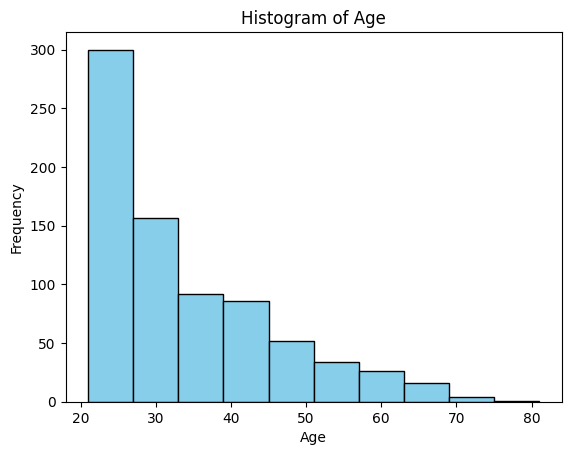

In [14]:
#Age에 0 있는지 확인
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=42)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1),
                                                    df['Outcome'], # target variable = Transported
                                                    test_size=0.3, random_state=42)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [16]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.000000,18.00000,58.000000,23.9,0.260,22
139,5,105.0,72.000000,29.00000,325.000000,36.9,0.159,28
485,0,135.0,68.000000,42.00000,250.000000,42.3,0.365,24
547,4,131.0,68.000000,21.00000,166.000000,33.1,0.160,28
18,1,103.0,30.000000,38.00000,83.000000,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.00000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,29.15342,155.548223,22.4,0.207,27
270,10,101.0,86.000000,37.00000,155.548223,45.6,1.136,38
435,0,141.0,72.405184,29.15342,155.548223,42.4,0.205,29


In [17]:
# 평가지표 출력
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.696969696969697
